# Consistency bookkeeping

In this notebook, we check the consistency between the old and new bookkeepings

In [ ]:
THIS NOTEBOOK IS NOW BROKEN (p1d_archive no longer available) AND SHOULD BE DELETED

## Read Pedersen21 post-processing

Using old and new code

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lace.archive import gadget_archive, p1d_archive
import numpy as np
import matplotlib.pyplot as plt

#### Old

In [2]:
# it drops tau rescalings by default  (these were not used in Pedersen et al. 2021, 2023)
archive_old = p1d_archive.archiveP1D(
    basedir="/lace/emulator/sim_suites/Australia20/",
    drop_tau_rescalings=True,
)
len(archive_old.data)

330

#### New

In [3]:
archive = gadget_archive.GadgetArchive(postproc='Pedersen21')
archive_training = archive.get_training_data()
len(archive_training)

330

#### Check that both objects are indeed the same

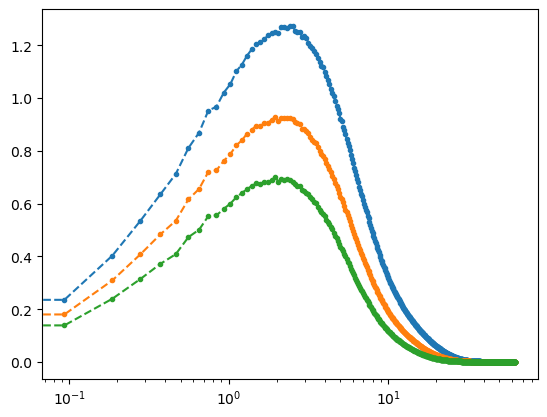

In [4]:
for ii in range(3):
    col = "C" + str(ii)
    k = archive_old.data[ii]["k_Mpc"]
    pk = archive_old.data[ii]["p1d_Mpc"]
    plt.plot(k, k * pk, col + ".")

    k = archive_training[ii]["k_Mpc"]
    pk = archive_training[ii]["p1d_Mpc"]
    plt.plot(k, k * pk, col + "--")
plt.xscale("log")